#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer dummies a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos una métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import datetime


# scikit-learn
from sklearn.linear_model    import LinearRegression, LogisticRegression
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar datos
rrhh = pd.read_csv('/content/drive/MyDrive/Bootcamp/rrhh.csv')

In [ ]:
rrhh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
rrhh.shape

(1000, 6)

A primera vista, nuestro dataset tiene 1000 registros y 6 variables, de las cuales 2 son categóricas (Posicion, Educacion) y 4 numéricas (Experiencia, Hijos, Casado, Salario).

No tiene datos nulos.

In [ ]:
rrhh.describe()

,Experiencia,Hijos,Casado,Salario
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000
std,2.577612,1.208823,0.491138,11520.200049
min,0.100000,0.000000,0.000000,5630.000000
25%,4.600000,0.000000,0.000000,22557.500000
50%,6.400000,1.000000,1.000000,29470.000000
75%,8.100000,2.000000,1.000000,37922.500000
max,15.200000,4.000000,1.000000,83470.000000


In [ ]:
rrhh.describe(include='object')

,Posicion,Educacion
count,1000,1000
unique,3,3
top,Analista,Bachillerato
freq,790,531


In [ ]:
print(rrhh['Posicion'].value_counts())
print(rrhh['Educacion'].value_counts())

Posicion
Analista       790
Coordinador    151
Gerente         59
Name: count, dtype: int64
Educacion
Bachillerato    531
Licenciatura    369
Posgrado        100
Name: count, dtype: int64


Ambas variables categóricas tienen 3 valores distintos.

En el caso de "Posicion" son 'Analista', 'Coordinador' y 'Gerente'.
En el caso de "Educacion" son 'Bachillerato', 'Licenciatura' y 'Posgrado'.

In [ ]:
rrhh.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
#verificar los duplicados de 'data'
rrhh.duplicated().sum()

0

In [ ]:
#verificar la completitud de 'data'
completitud = pd.DataFrame(rrhh.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total_dfaltantes"})
completitud["completitud"] = (1 - completitud["total_dfaltantes"] / rrhh.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total_dfaltantes,completitud
0,Experiencia,0,100.0
1,Posicion,0,100.0
2,Hijos,0,100.0
3,Casado,0,100.0
4,Educacion,0,100.0
5,Salario,0,100.0


El dataset no tiene registros duplicados y la completitud es del 100%.

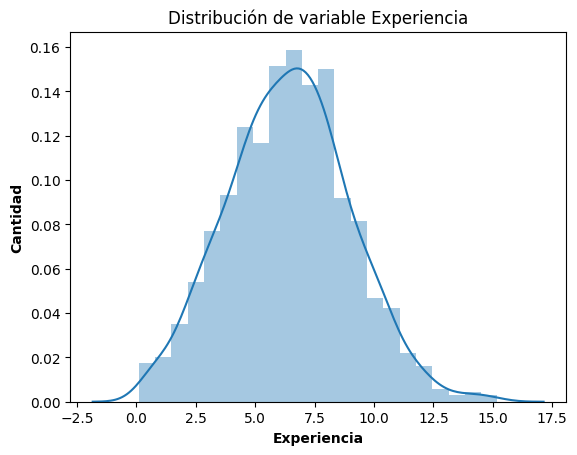

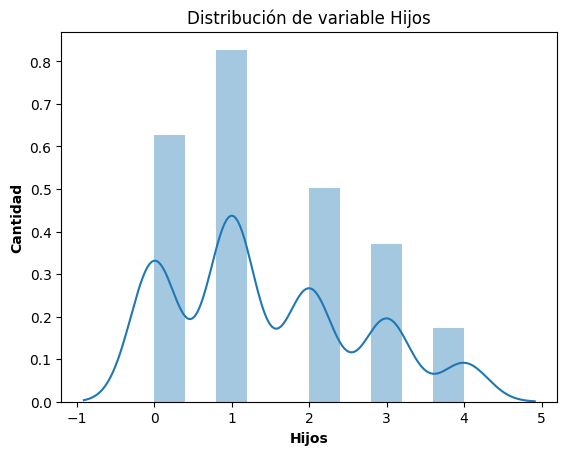

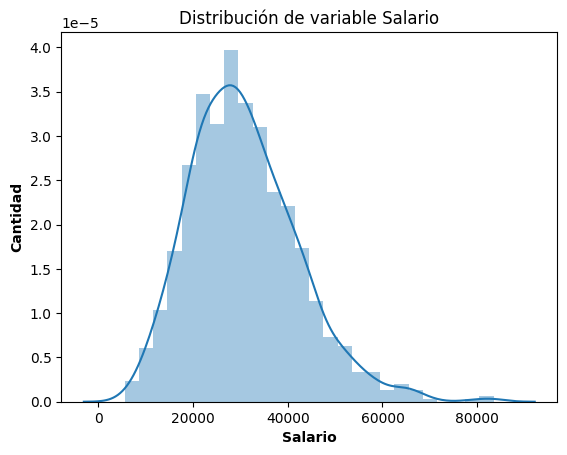

In [ ]:
#gráficos de distribucion de variables 'Experiencia', 'hijos', 'salario'

# Grafico de distribucion de la variable 'Experiencia'
sns.distplot(rrhh['Experiencia'])
plt.title('Distribución de variable Experiencia')
plt.xlabel('Experiencia', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Hijos'
sns.distplot(rrhh['Hijos'])
plt.title('Distribución de variable Hijos')
plt.xlabel('Hijos', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Salario'
sns.distplot(rrhh['Salario'])
plt.title('Distribución de variable Salario')
plt.xlabel('Salario', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()


Los valores de las variables 'Experiencia', 'Hijos', 'Salario' tienen una distribución normal, lo que significa que la presencia de outliers puede que no exista, y si las hay son muy pocas y no genenrarán impacto en nuestras predicciones.

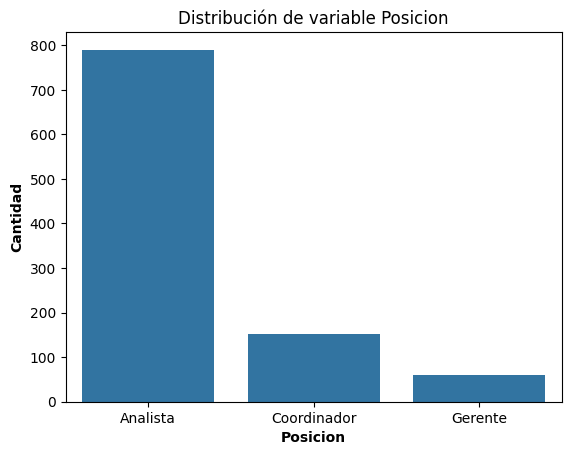

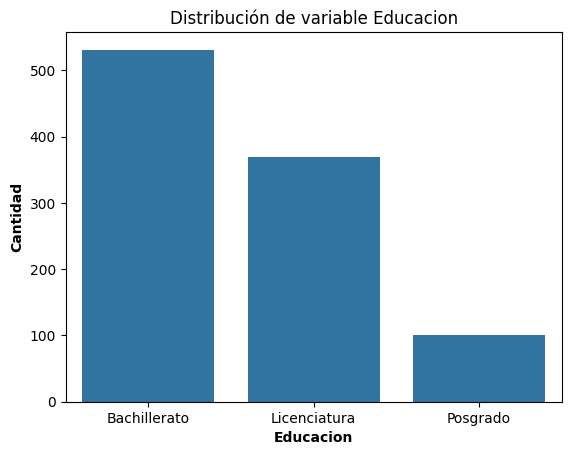

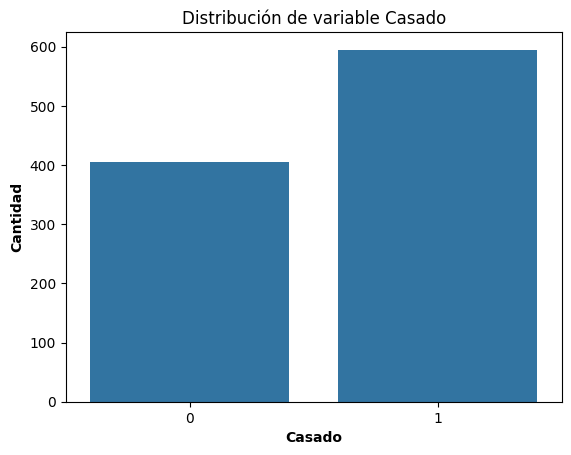

In [ ]:
#gráficos de distribucion de variables 'Posicion', 'Educacion'

# Grafico de distribucion de la variable 'Posicion'
sns.countplot(x='Posicion', data=rrhh)
plt.title('Distribución de variable Posicion')
plt.xlabel('Posicion', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Educacion'
sns.countplot(x='Educacion', data=rrhh)
plt.title('Distribución de variable Educacion')
plt.xlabel('Educacion', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

# Grafico de distribucion de la variable 'Casado'
sns.countplot(x='Casado', data=rrhh)
plt.title('Distribución de variable Casado')
plt.xlabel('Casado', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

- En la variable 'Posicion' la más frecuente es 'Analista' con gran diferencia comparado con los otros 2 valores. Esto quiere decir que en esa posición está el grueso del tipo de empleado, ya que son los que se dedican a hacer el trabajo más técnico.

- En la variable 'Educacion' el valor más frecuente es 'Bachillerato' ya que es suficiente para postular al trabajo de 'Analista'. A medida que aumenta el nivel educacional, hay más aptitudes para optar a posiciones de jefatura (Coordinador, Gerente)

- En la variable 'Casado' la distribución de los valores es bastante pareja. Aproc¡ximadamente, el 60% sí está casado/a y el 40% no lo está.

In [ ]:
#Aplicar dummies en las variables 'Posicion' y 'Educacion'
rrhh = pd.get_dummies(rrhh, columns=['Posicion','Educacion'], drop_first=True)
rrhh.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,False,False,False,False
1,5.6,2,0,31240,False,False,True,False
2,11.7,1,0,63880,False,False,True,False
3,5.2,2,1,29960,False,False,True,False
4,7.2,2,1,34710,True,False,True,False


In [ ]:
#Asignar variable 'Salario' como objetivo
X = rrhh.drop('Salario', axis=1)
y = rrhh['Salario']

In [ ]:
X.head()

,Experiencia,Hijos,Casado,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,False,False,False,False
1,5.6,2,0,False,False,True,False
2,11.7,1,0,False,False,True,False
3,5.2,2,1,False,False,True,False
4,7.2,2,1,True,False,True,False


In [ ]:
y.head()

0    13540
1    31240
2    63880
3    29960
4    34710
Name: Salario, dtype: int64

In [ ]:
X.shape, y.shape

((1000, 7), (1000,))

- Vamos a aplicar una estandarización con 'StandardScaler' a la variable 'Experiencia' ya que tiene valores flotantes y más elevados que las otras variables independientes "X".

In [ ]:
#Estandarizar variables 'Experiencia' e 'Hijos' en 'X'

scaler = StandardScaler()
X['Experiencia'] = scaler.fit_transform(X[['Experiencia']])
X['Hijos'] = scaler.fit_transform(X[['Hijos']])
X.head()


,Experiencia,Hijos,Casado,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,-2.296374,2.108063,1,False,False,False,False
1,-0.316808,0.452733,0,False,False,True,False
2,2.050908,-0.374932,0,False,False,True,False
3,-0.472068,0.452733,1,False,False,True,False
4,0.304232,0.452733,1,True,False,True,False


- En 'X' vamos a estandarizar solo las variables 'Experiencia' e 'Hijos', ya que tanto las variables que generamos con 'get.dummies' y la variable 'Casado' son binarias, por lo tanto no necesitan ser estandarizadas.

In [ ]:
#Spliteamos la orden en conjunto de entrenamiento y en conjunto de pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

- Como nuestra variable objetivo es numérica, vamos a aplicar regresión lineal a nuestro dataset.

In [ ]:
#Hemos seleccionado el modelo de regresión lineal.
model = LinearRegression()

In [ ]:
#entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predecir con el conjunto de pruebas
y_pred = model.predict(X_test)

In [ ]:
#Calcular el rmse y r2 de nuestra prediccion
# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular el R2
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("RMSE:", rmse)
print("R2:", r2)


RMSE: 6619.020983455385
R2: 0.6522414643713006


In [ ]:
y.describe()

count     1000.000000
mean     30787.060000
std      11520.200049
min       5630.000000
25%      22557.500000
50%      29470.000000
75%      37922.500000
max      83470.000000
Name: Salario, dtype: float64

- El valor del R2 nos indica que el modelo explica una parte moderada de la variabilidad de los datos (ajuste moderado).

- El valor de RMSE en el contexto de nuestros datos nos indica que es menor a la desviación estándar de nuestra variable objetivo, por lo tanto sugiere que el modelo tiene un buen rendimiento.

- En conclusión, nuestro modelo de predicción tiene un desempeño bastante aceptable, pero claramente puede ser mejorado con el uso de regularizadores como Ridge, Lasso o ElasticNet.

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
# Importar datos
rrhh_2 = pd.read_csv('/content/drive/MyDrive/Bootcamp/rrhh_2.csv')

In [ ]:
rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [ ]:
rrhh_2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
rrhh_2.shape

(1000, 7)

In [ ]:
rrhh_2['Contratado'].value_counts()

Contratado
1    518
0    482
Name: count, dtype: int64

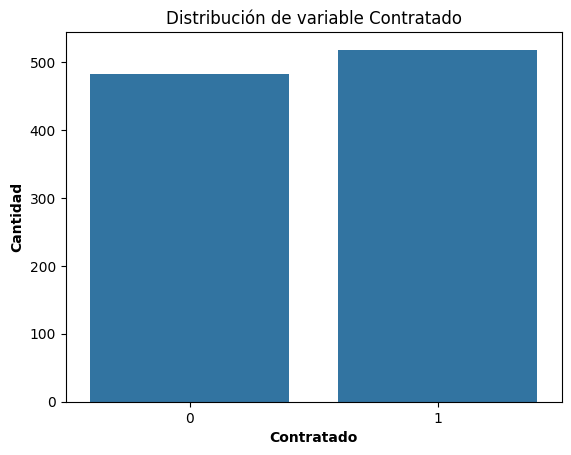

In [ ]:
# Grafico de distribucion de la variable 'Contratado'
sns.countplot(x='Contratado', data=rrhh_2)
plt.title('Distribución de variable Contratado')
plt.xlabel('Contratado', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.show()

Vemos que nuestra nueva variable objetivo 'Contratado' es binaria y tiene ambos valores repartidos casi en un 50-50%.

Además si sumamos la frecuencia de ambos valores nos da exactamente 1000, por lo tanto no tenemos datos faltantes, una completitud del 100% y al ser binaria solo con 2 resultdos posibles (0,1) esta variable tampoco contiene valores outliers.

In [ ]:
#Aplicar dummies en las variables 'Posicion' y 'Educacion'
rrhh_2 = pd.get_dummies(rrhh_2, columns=['Posicion','Educacion'], drop_first=True)
rrhh_2.head()

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,1,False,False,False,False
1,5.6,2,0,31240,0,False,False,True,False
2,11.7,1,0,63880,0,False,False,True,False
3,5.2,2,1,29960,1,False,False,True,False
4,7.2,2,1,34710,1,True,False,True,False


In [ ]:
#Asignar variable 'Contratado' como objetivo
X = rrhh_2.drop('Contratado', axis=1)
y = rrhh_2['Contratado']

In [ ]:
X.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,False,False,False,False
1,5.6,2,0,31240,False,False,True,False
2,11.7,1,0,63880,False,False,True,False
3,5.2,2,1,29960,False,False,True,False
4,7.2,2,1,34710,True,False,True,False


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Contratado, dtype: int64

In [ ]:
X.shape, y.shape

((1000, 8), (1000,))

In [ ]:
#Estandarizar variable 'Experiencia', 'Salario', 'Hijos' de 'X'

scaler = StandardScaler()
X['Experiencia'] = scaler.fit_transform(X[['Experiencia']])
X['Salario'] = scaler.fit_transform(X[['Salario']])
X['Hijos'] = scaler.fit_transform(X[['Hijos']])
X.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,-2.296374,2.108063,1,-1.497864,False,False,False,False
1,-0.316808,0.452733,0,0.039337,False,False,True,False
2,2.050908,-0.374932,0,2.874039,False,False,True,False
3,-0.472068,0.452733,1,-0.071828,False,False,True,False
4,0.304232,0.452733,1,0.340697,True,False,True,False


In [ ]:
#Spliteamos la orden en conjunto de entrenamiento y en conjunto de pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

- Como nuestra variable objetivo es categórica, vamos a implementar una regresión logística.

In [ ]:
#Hemos seleccionado el modelo de regresión logística.
model = LogisticRegression()

In [ ]:
#Entrenamos el modelo.
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predecir con el conjunto de pruebas
y_pred = model.predict(X_test)

In [ ]:
#Aplicar cuadro de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 98,  48],
       [ 25, 129]])

In [ ]:
#Medir la precisión de la regresion logistica
accuracy_score(y_test, y_pred)

0.7566666666666667

- Esta métrica nos indica que nuestro modelo tiene una precisión aproximada del 76%, por lo tanto va a hacer una buena calificación en 3 de cada 4 casos, aproximadamente.

- Se sugiere bajar la cantidad de 'falsos positivos' mediante otros algoritmos o validación cruzada, ya que en este caso se pueden estar contratando personas que piden un salario más alto en comparación a sus aptitudes y generan gastos adicionales a una empresa determinada.

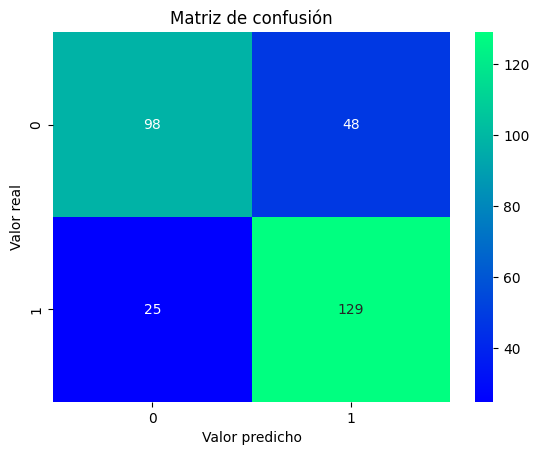

In [ ]:
#Graficar un mapa de calor del cuadro de confusión
sns.heatmap(cm, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión')
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()